In [235]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
import requests
import csv

# Part I (50%)

## 1.1. Linear Regression

### 1.1.1. (5 marks)

In [14]:
def change_basis_vector(vector,degree):
    if degree == 1:
        return np.ones(vector.shape)
    output = np.ones(vector.shape)
    if degree == 2:
        return np.append(output,vector,axis=1)
    output = np.append(output,vector,axis=1)
    for i in range(2,degree):
        output = np.append(output,vector**i,axis=1)
    return output

In [15]:
class LinearRegressionMSE:
    def __init__(self):
        self.coef_ = []
    def fit(self,x,y):
        self.coef_ = np.longdouble((np.linalg.inv(x.T@x)@x.T)@y)
    def predict(self,x):
        return x@self.coef_
    def mse(self,pred,y):
        return np.sum((abs(pred-y)**2))/pred.shape[0]

In [16]:
x = np.asarray([[1],[2],[3],[4]])
y = np.asarray([[3],[2],[0],[5]])

lin_reg_1 = LinearRegressionMSE()
lin_reg_1.fit(change_basis_vector(x,1),y)
pred_1 = lin_reg_1.predict(change_basis_vector(x,1))
mse_1 = lin_reg_1.mse(pred_1,y)

lin_reg_2 = LinearRegressionMSE()
lin_reg_2.fit(change_basis_vector(x,2),y)
pred_2 = lin_reg_2.predict(change_basis_vector(x,2))
mse_2 = lin_reg_2.mse(pred_2,y)

lin_reg_3 = LinearRegressionMSE()
lin_reg_3.fit(change_basis_vector(x,3),y)
pred_3 = lin_reg_3.predict(change_basis_vector(x,3))
mse_3 = lin_reg_3.mse(pred_3,y)

lin_reg_4 = LinearRegressionMSE()
lin_reg_4.fit(change_basis_vector(x,4),y)
pred_4 = lin_reg_4.predict(change_basis_vector(x,4))
mse_4 = lin_reg_4.mse(pred_4,y)

In [17]:
def get_pol(x,model):
    output = 0
    for i in range(model.coef_.shape[0]):
        output += model.coef_[i]*x**i
    return output

def get_sk_pol(x,model):
    output = 0
    coeffs = model.coef_
    output += model.intercept_[0]
    for i in range(1,coeffs.shape[1]):
        output += coeffs[0][i]*x**i
    return output

### 1.1.1. a) Plot

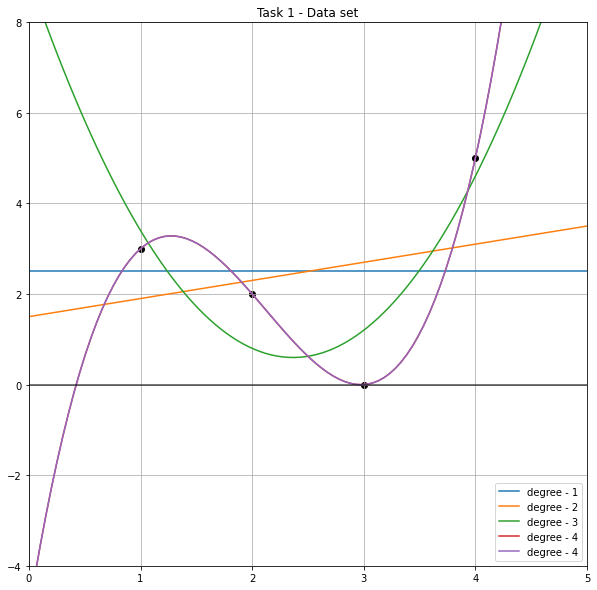

In [18]:
x_axis = np.linspace(0,5,100)

plt.figure(figsize=[10,10])
plt.scatter(x,y,color="k")
plt.plot(x_axis,get_pol(x_axis,lin_reg_1),label="degree - 1")
plt.plot(x_axis,get_pol(x_axis,lin_reg_2),label="degree - 2")
plt.plot(x_axis,get_pol(x_axis,lin_reg_3),label="degree - 3")
plt.plot(x_axis,get_pol(x_axis,lin_reg_4),label="degree - 4")
plt.plot(x_axis,get_pol(x_axis,lin_reg_4),label="degree - 4")
plt.grid()
plt.xlim(0,5)
plt.ylim(-4,8)
plt.axhline(0,color='k',alpha=0.7)
plt.title("Task 1 - Data set")
plt.legend()
plt.show()

### 1.1.1. b) Equations for k = 1,2,3

for k = 1, y = 2.5 <br>
for k = 2, y = 1.5 + 0.4x <br>
for k = 3, y = 9 - 7.1x + 1.5x^2

### 1.1.1. c) MSE for k = 1,2,3,4

In [20]:
print(f"Mean Square Errors for 1,2,3,4 degree polynomials (respectively): {mse_1},{mse_2},{mse_3},{mse_4}")

Mean Square Errors for 1,2,3,4 degree polynomials (respectively): 3.25,3.05,0.8000000000000008,1.39705877919448e-23


### 1.1.2. (10 marks)

### 1.1.2. a) Plot linear regression plots with different degrees (2,5,10,14,18)

In [21]:
sample_x = np.random.random(30)

def func_x(x):
    return np.sin(2*np.pi*x)**2
func_x_vectorised = np.vectorize(func_x)

y = func_x_vectorised(sample_x)+np.random.normal(0,0.07,30)

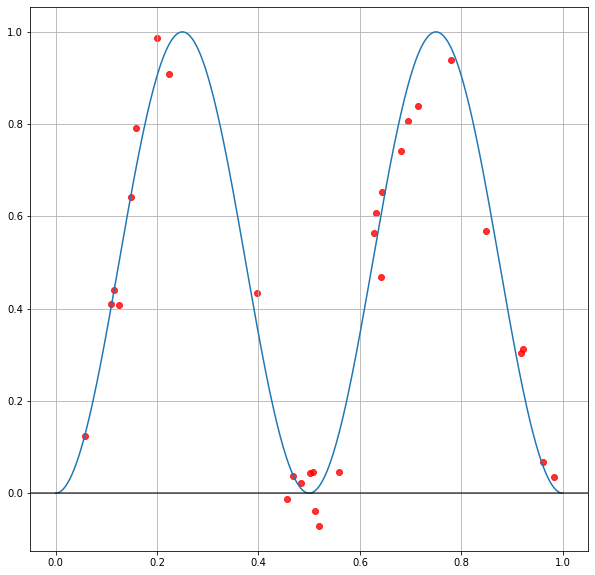

In [22]:
x_axis = np.linspace(0,1,500)
plt.figure(figsize=[10,10])
plt.plot(x_axis,np.sin(2*np.pi*x_axis)**2)
plt.axhline(0,color="k",alpha=0.7)
plt.scatter(sample_x,y,color="r",alpha=0.8)
plt.grid()
plt.show()

In [23]:
x = sample_x.reshape(-1,1)
y = y.reshape(-1,1)

lin_reg_2 = LinearRegressionMSE()
lin_reg_2.fit(change_basis_vector(x,2),y)
pred_2 = lin_reg_2.predict(change_basis_vector(x,2))
mse_2 = lin_reg_2.mse(pred_2,y)

lin_reg_5 = LinearRegressionMSE()
lin_reg_5.fit(change_basis_vector(x,5),y)
pred_5 = lin_reg_5.predict(change_basis_vector(x,5))
mse_5 = lin_reg_5.mse(pred_5,y)

lin_reg_10 = LinearRegressionMSE()
lin_reg_10.fit(change_basis_vector(x,10),y)
pred_10 = lin_reg_10.predict(change_basis_vector(x,10))
mse_10 = lin_reg_10.mse(pred_10,y)

lin_reg_14 = LinearRegressionMSE()
lin_reg_14.fit(change_basis_vector(x,14),y)
pred_14 = lin_reg_14.predict(change_basis_vector(x,14))
mse_14 = lin_reg_14.mse(pred_14,y)

lin_reg_18 = LinearRegressionMSE()
lin_reg_18.fit(change_basis_vector(x,18),y)
pred_18 = lin_reg_18.predict(change_basis_vector(x,18))
mse_18 = lin_reg_18.mse(pred_18,y)

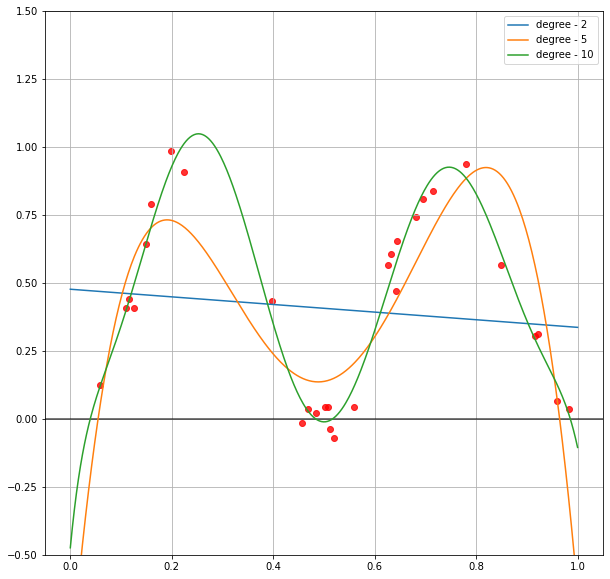

In [28]:
plt.figure(figsize=[10,10])
plt.axhline(0,color="k",alpha=0.7)
plt.scatter(sample_x,y,color="r",alpha=0.8)
plt.plot(x_axis,get_pol(x_axis,lin_reg_2),label="degree - 2")
plt.plot(x_axis,get_pol(x_axis,lin_reg_5),label="degree - 5")
plt.plot(x_axis,get_pol(x_axis,lin_reg_10),label="degree - 10")
#plt.plot(x_axis,get_pol(x_axis,lin_reg_14),label="degree - 14")
#plt.plot(x_axis,get_pol(x_axis,lin_reg_18),label="degree - 18")
plt.grid()
plt.ylim(-0.5,1.5)
plt.legend()
plt.show()

### 1.1.2. b) Plot the natural log of the training error versus the polynomial dimension

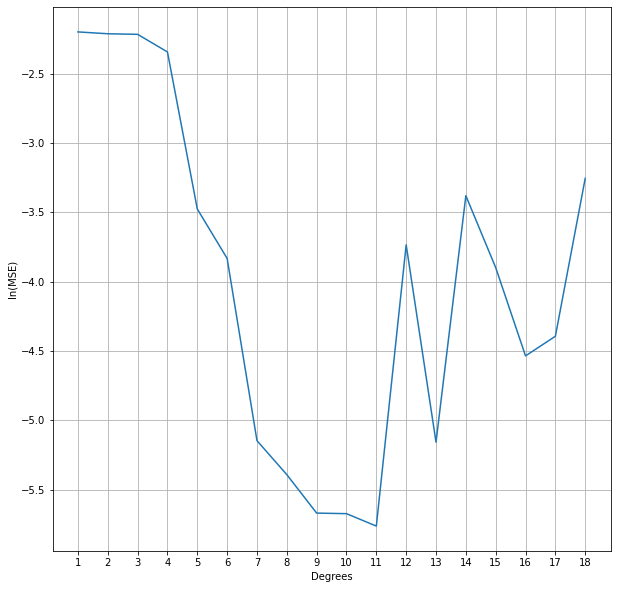

In [29]:
lin_reg_1 = LinearRegressionMSE()
lin_reg_1.fit(change_basis_vector(x,1),y)
pred_1 = lin_reg_1.predict(change_basis_vector(x,1))
mse_1 = lin_reg_1.mse(pred_1,y)

lin_reg_3 = LinearRegressionMSE()
lin_reg_3.fit(change_basis_vector(x,3),y)
pred_3 = lin_reg_3.predict(change_basis_vector(x,3))
mse_3 = lin_reg_3.mse(pred_3,y)

lin_reg_4 = LinearRegressionMSE()
lin_reg_4.fit(change_basis_vector(x,4),y)
pred_4 = lin_reg_4.predict(change_basis_vector(x,4))
mse_4 = lin_reg_4.mse(pred_4,y)

lin_reg_6 = LinearRegressionMSE()
lin_reg_6.fit(change_basis_vector(x,6),y)
pred_6 = lin_reg_6.predict(change_basis_vector(x,6))
mse_6 = lin_reg_6.mse(pred_6,y)

lin_reg_7 = LinearRegressionMSE()
lin_reg_7.fit(change_basis_vector(x,7),y)
pred_7 = lin_reg_7.predict(change_basis_vector(x,7))
mse_7 = lin_reg_7.mse(pred_7,y)

lin_reg_8 = LinearRegressionMSE()
lin_reg_8.fit(change_basis_vector(x,8),y)
pred_8 = lin_reg_8.predict(change_basis_vector(x,8))
mse_8 = lin_reg_8.mse(pred_8,y)

lin_reg_9 = LinearRegressionMSE()
lin_reg_9.fit(change_basis_vector(x,9),y)
pred_9 = lin_reg_9.predict(change_basis_vector(x,9))
mse_9 = lin_reg_9.mse(pred_9,y)

lin_reg_11 = LinearRegressionMSE()
lin_reg_11.fit(change_basis_vector(x,11),y)
pred_11 = lin_reg_11.predict(change_basis_vector(x,11))
mse_11 = lin_reg_11.mse(pred_11,y)

lin_reg_12 = LinearRegressionMSE()
lin_reg_12.fit(change_basis_vector(x,12),y)
pred_12 = lin_reg_12.predict(change_basis_vector(x,12))
mse_12 = lin_reg_12.mse(pred_12,y)

lin_reg_13 = LinearRegressionMSE()
lin_reg_13.fit(change_basis_vector(x,13),y)
pred_13 = lin_reg_13.predict(change_basis_vector(x,13))
mse_13 = lin_reg_13.mse(pred_13,y)

lin_reg_15 = LinearRegressionMSE()
lin_reg_15.fit(change_basis_vector(x,15),y)
pred_15 = lin_reg_15.predict(change_basis_vector(x,15))
mse_15 = lin_reg_15.mse(pred_15,y)

lin_reg_16 = LinearRegressionMSE()
lin_reg_16.fit(change_basis_vector(x,16),y)
pred_16 = lin_reg_16.predict(change_basis_vector(x,16))
mse_16 = lin_reg_16.mse(pred_16,y)

lin_reg_17 = LinearRegressionMSE()
lin_reg_17.fit(change_basis_vector(x,17),y)
pred_17 = lin_reg_17.predict(change_basis_vector(x,17))
mse_17 = lin_reg_17.mse(pred_17,y)

train_mses = [mse_1,mse_2,mse_3,mse_4,mse_5,mse_6,mse_7,mse_8,mse_9,mse_10,mse_11,mse_12,mse_13,mse_14,mse_15,mse_16,mse_17,mse_18]
ln_mses = [np.log(mse) for mse in train_mses]
degrees = np.arange(1,19,1)
plt.figure(figsize=[10,10])
plt.plot(degrees,ln_mses)
plt.ylabel("ln(MSE)")
plt.xlabel("Degrees")
plt.xticks(np.arange(1,19,1))
plt.grid()
plt.show()

### 1.1.2. c) Test set 

In [30]:
test_x = np.random.random(1000)
test_y = func_x_vectorised(test_x)+np.random.normal(0,0.07,1000)

test_x = test_x.reshape(-1,1)
test_y = test_y.reshape(-1,1)

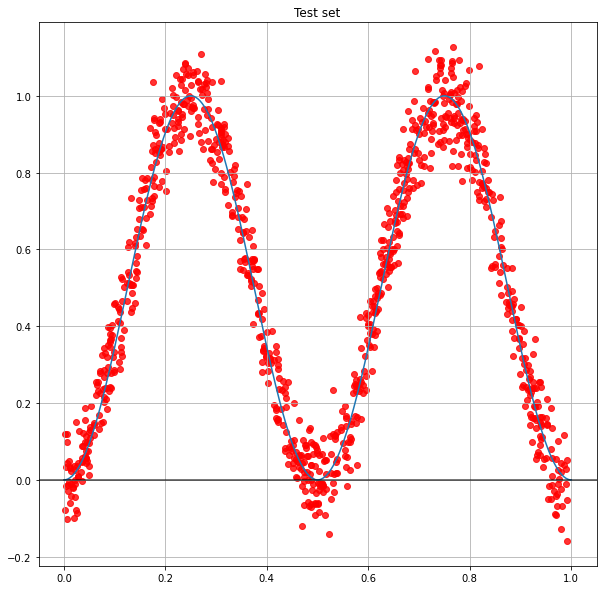

In [31]:
x_axis = np.linspace(0,1,500)
plt.figure(figsize=[10,10])
plt.plot(x_axis,np.sin(2*np.pi*x_axis)**2)
plt.axhline(0,color="k",alpha=0.7)
plt.scatter(test_x,test_y,color="r",alpha=0.8)
plt.title("Test set")
plt.grid()
plt.show()

In [32]:
test_mse_1 = lin_reg_1.mse(lin_reg_1.predict(change_basis_vector(test_x,1)),test_y)
test_mse_2 = lin_reg_2.mse(lin_reg_2.predict(change_basis_vector(test_x,2)),test_y)
test_mse_3 = lin_reg_3.mse(lin_reg_3.predict(change_basis_vector(test_x,3)),test_y)
test_mse_4 = lin_reg_4.mse(lin_reg_4.predict(change_basis_vector(test_x,4)),test_y)
test_mse_5 = lin_reg_5.mse(lin_reg_5.predict(change_basis_vector(test_x,5)),test_y)
test_mse_6 = lin_reg_6.mse(lin_reg_6.predict(change_basis_vector(test_x,6)),test_y)
test_mse_7 = lin_reg_7.mse(lin_reg_7.predict(change_basis_vector(test_x,7)),test_y)
test_mse_8 = lin_reg_8.mse(lin_reg_8.predict(change_basis_vector(test_x,8)),test_y)
test_mse_9 = lin_reg_9.mse(lin_reg_9.predict(change_basis_vector(test_x,9)),test_y)
test_mse_10 = lin_reg_10.mse(lin_reg_10.predict(change_basis_vector(test_x,10)),test_y)
test_mse_11 = lin_reg_11.mse(lin_reg_11.predict(change_basis_vector(test_x,11)),test_y)
test_mse_12 = lin_reg_12.mse(lin_reg_12.predict(change_basis_vector(test_x,12)),test_y)
test_mse_13 = lin_reg_13.mse(lin_reg_13.predict(change_basis_vector(test_x,13)),test_y)
test_mse_14 = lin_reg_14.mse(lin_reg_14.predict(change_basis_vector(test_x,14)),test_y)
test_mse_15 = lin_reg_15.mse(lin_reg_15.predict(change_basis_vector(test_x,15)),test_y)
test_mse_16 = lin_reg_16.mse(lin_reg_16.predict(change_basis_vector(test_x,16)),test_y)
test_mse_17 = lin_reg_17.mse(lin_reg_17.predict(change_basis_vector(test_x,17)),test_y)
test_mse_18 = lin_reg_18.mse(lin_reg_18.predict(change_basis_vector(test_x,18)),test_y)

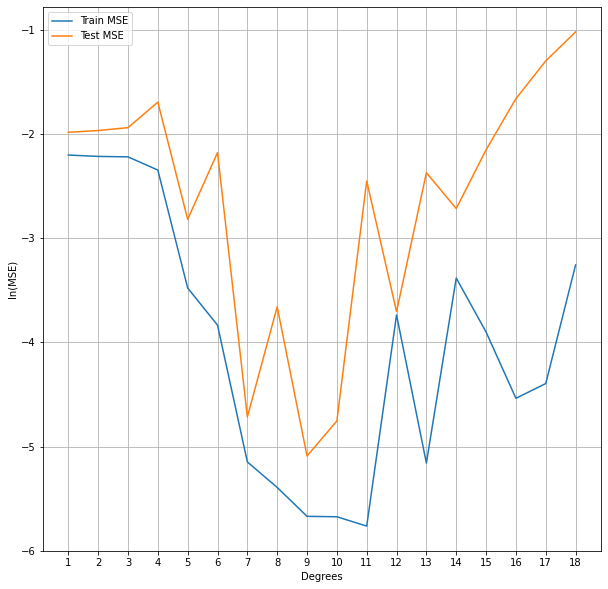

In [33]:
test_mses = [test_mse_1,test_mse_2,test_mse_3,test_mse_4,test_mse_5,test_mse_6,test_mse_7,test_mse_8,test_mse_9,test_mse_10,test_mse_11,test_mse_12,test_mse_13,test_mse_14,test_mse_15,test_mse_16,test_mse_17,test_mse_18]
ln_mses_test = [np.log(mse) for mse in test_mses]
degrees = np.arange(1,19,1)
plt.figure(figsize=[10,10])
plt.plot(degrees,ln_mses,label="Train MSE")
plt.plot(degrees,ln_mses_test,label="Test MSE")
plt.ylabel("ln(MSE)")
plt.xlabel("Degrees")
plt.xticks(np.arange(1,19,1))
plt.grid()
plt.legend()
plt.show()

### 1.1.2. d) Repeat for 100 iterations and plot the average ln(MSE) for training and testing

In [34]:
def train_and_test(iters):
    avgs_ln_train = np.zeros(18)
    avgs_ln_test = np.zeros(18)
    for iter in range(iters):

        sample_x = np.random.random(30)
        def func_x(x):
            return np.sin(2*np.pi*x)**2
        func_x_vectorised = np.vectorize(func_x)
        y = func_x_vectorised(sample_x)+np.random.normal(0,0.07,30)

        x = sample_x.reshape(-1,1)
        y = y.reshape(-1,1)

        lin_reg_2 = LinearRegressionMSE()
        lin_reg_2.fit(change_basis_vector(x,2),y)
        pred_2 = lin_reg_2.predict(change_basis_vector(x,2))
        mse_2 = lin_reg_2.mse(pred_2,y)

        lin_reg_5 = LinearRegressionMSE()
        lin_reg_5.fit(change_basis_vector(x,5),y)
        pred_5 = lin_reg_5.predict(change_basis_vector(x,5))
        mse_5 = lin_reg_5.mse(pred_5,y)

        lin_reg_10 = LinearRegressionMSE()
        lin_reg_10.fit(change_basis_vector(x,10),y)
        pred_10 = lin_reg_10.predict(change_basis_vector(x,10))
        mse_10 = lin_reg_10.mse(pred_10,y)

        lin_reg_14 = LinearRegressionMSE()
        lin_reg_14.fit(change_basis_vector(x,14),y)
        pred_14 = lin_reg_14.predict(change_basis_vector(x,14))
        mse_14 = lin_reg_14.mse(pred_14,y)

        lin_reg_18 = LinearRegressionMSE()
        lin_reg_18.fit(change_basis_vector(x,18),y)
        pred_18 = lin_reg_18.predict(change_basis_vector(x,18))
        mse_18 = lin_reg_18.mse(pred_18,y)

        lin_reg_1 = LinearRegressionMSE()
        lin_reg_1.fit(change_basis_vector(x,1),y)
        pred_1 = lin_reg_1.predict(change_basis_vector(x,1))
        mse_1 = lin_reg_1.mse(pred_1,y)

        lin_reg_3 = LinearRegressionMSE()
        lin_reg_3.fit(change_basis_vector(x,3),y)
        pred_3 = lin_reg_3.predict(change_basis_vector(x,3))
        mse_3 = lin_reg_3.mse(pred_3,y)

        lin_reg_4 = LinearRegressionMSE()
        lin_reg_4.fit(change_basis_vector(x,4),y)
        pred_4 = lin_reg_4.predict(change_basis_vector(x,4))
        mse_4 = lin_reg_4.mse(pred_4,y)

        lin_reg_6 = LinearRegressionMSE()
        lin_reg_6.fit(change_basis_vector(x,6),y)
        pred_6 = lin_reg_6.predict(change_basis_vector(x,6))
        mse_6 = lin_reg_6.mse(pred_6,y)

        lin_reg_7 = LinearRegressionMSE()
        lin_reg_7.fit(change_basis_vector(x,7),y)
        pred_7 = lin_reg_7.predict(change_basis_vector(x,7))
        mse_7 = lin_reg_7.mse(pred_7,y)

        lin_reg_8 = LinearRegressionMSE()
        lin_reg_8.fit(change_basis_vector(x,8),y)
        pred_8 = lin_reg_8.predict(change_basis_vector(x,8))
        mse_8 = lin_reg_8.mse(pred_8,y)

        lin_reg_9 = LinearRegressionMSE()
        lin_reg_9.fit(change_basis_vector(x,9),y)
        pred_9 = lin_reg_9.predict(change_basis_vector(x,9))
        mse_9 = lin_reg_9.mse(pred_9,y)

        lin_reg_11 = LinearRegressionMSE()
        lin_reg_11.fit(change_basis_vector(x,11),y)
        pred_11 = lin_reg_11.predict(change_basis_vector(x,11))
        mse_11 = lin_reg_11.mse(pred_11,y)

        lin_reg_12 = LinearRegressionMSE()
        lin_reg_12.fit(change_basis_vector(x,12),y)
        pred_12 = lin_reg_12.predict(change_basis_vector(x,12))
        mse_12 = lin_reg_12.mse(pred_12,y)

        lin_reg_13 = LinearRegressionMSE()
        lin_reg_13.fit(change_basis_vector(x,13),y)
        pred_13 = lin_reg_13.predict(change_basis_vector(x,13))
        mse_13 = lin_reg_13.mse(pred_13,y)

        lin_reg_15 = LinearRegressionMSE()
        lin_reg_15.fit(change_basis_vector(x,15),y)
        pred_15 = lin_reg_15.predict(change_basis_vector(x,15))
        mse_15 = lin_reg_15.mse(pred_15,y)

        lin_reg_16 = LinearRegressionMSE()
        lin_reg_16.fit(change_basis_vector(x,16),y)
        pred_16 = lin_reg_16.predict(change_basis_vector(x,16))
        mse_16 = lin_reg_16.mse(pred_16,y)

        lin_reg_17 = LinearRegressionMSE()
        lin_reg_17.fit(change_basis_vector(x,17),y)
        pred_17 = lin_reg_17.predict(change_basis_vector(x,17))
        mse_17 = lin_reg_17.mse(pred_17,y)

        test_x = np.random.random(1000)
        test_y = func_x_vectorised(test_x)+np.random.normal(0,0.07,1000)

        test_x = test_x.reshape(-1,1)
        test_y = test_y.reshape(-1,1)
        
        test_mse_1 = lin_reg_1.mse(lin_reg_1.predict(change_basis_vector(test_x,1)),test_y)
        test_mse_2 = lin_reg_2.mse(lin_reg_2.predict(change_basis_vector(test_x,2)),test_y)
        test_mse_3 = lin_reg_3.mse(lin_reg_3.predict(change_basis_vector(test_x,3)),test_y)
        test_mse_4 = lin_reg_4.mse(lin_reg_4.predict(change_basis_vector(test_x,4)),test_y)
        test_mse_5 = lin_reg_5.mse(lin_reg_5.predict(change_basis_vector(test_x,5)),test_y)
        test_mse_6 = lin_reg_6.mse(lin_reg_6.predict(change_basis_vector(test_x,6)),test_y)
        test_mse_7 = lin_reg_7.mse(lin_reg_7.predict(change_basis_vector(test_x,7)),test_y)
        test_mse_8 = lin_reg_8.mse(lin_reg_8.predict(change_basis_vector(test_x,8)),test_y)
        test_mse_9 = lin_reg_9.mse(lin_reg_9.predict(change_basis_vector(test_x,9)),test_y)
        test_mse_10 = lin_reg_10.mse(lin_reg_10.predict(change_basis_vector(test_x,10)),test_y)
        test_mse_11 = lin_reg_11.mse(lin_reg_11.predict(change_basis_vector(test_x,11)),test_y)
        test_mse_12 = lin_reg_12.mse(lin_reg_12.predict(change_basis_vector(test_x,12)),test_y)
        test_mse_13 = lin_reg_13.mse(lin_reg_13.predict(change_basis_vector(test_x,13)),test_y)
        test_mse_14 = lin_reg_14.mse(lin_reg_14.predict(change_basis_vector(test_x,14)),test_y)
        test_mse_15 = lin_reg_15.mse(lin_reg_15.predict(change_basis_vector(test_x,15)),test_y)
        test_mse_16 = lin_reg_16.mse(lin_reg_16.predict(change_basis_vector(test_x,16)),test_y)
        test_mse_17 = lin_reg_17.mse(lin_reg_17.predict(change_basis_vector(test_x,17)),test_y)
        test_mse_18 = lin_reg_18.mse(lin_reg_18.predict(change_basis_vector(test_x,18)),test_y)

        train_mses = [mse_1,mse_2,mse_3,mse_4,mse_5,mse_6,mse_7,mse_8,mse_9,mse_10,mse_11,mse_12,mse_13,mse_14,mse_15,mse_16,mse_17,mse_18]
        ln_mses =  np.asarray([np.log(mse) for mse in train_mses])
        test_mses = [test_mse_1,test_mse_2,test_mse_3,test_mse_4,test_mse_5,test_mse_6,test_mse_7,test_mse_8,test_mse_9,test_mse_10,test_mse_11,test_mse_12,test_mse_13,test_mse_14,test_mse_15,test_mse_16,        test_mse_17,test_mse_18]
        ln_mses_test = np.asarray([np.log(mse) for mse in test_mses])

        avgs_ln_train += ln_mses 
        avgs_ln_test += ln_mses_test

    return avgs_ln_train/iter,avgs_ln_test/iter

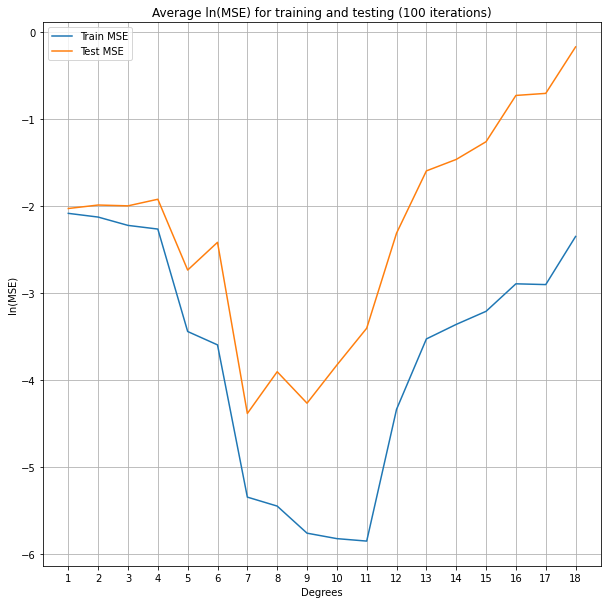

In [35]:
avgs_ln_train, avgs_ln_test = train_and_test(100)
degrees = np.arange(1,19,1)
plt.figure(figsize=[10,10])
plt.plot(degrees,avgs_ln_train,label="Train MSE")
plt.plot(degrees,avgs_ln_test,label="Test MSE")
plt.ylabel("ln(MSE)")
plt.xlabel("Degrees")
plt.xticks(np.arange(1,19,1))
plt.title("Average ln(MSE) for training and testing (100 iterations)")
plt.grid()
plt.legend()
plt.show()

### 1.1.3. Sine basis

In [36]:
sample_x = np.random.random(30)
def func_x(x):
    return np.sin(2*np.pi*x)**2
func_x_vectorised = np.vectorize(func_x)
y = func_x_vectorised(sample_x)+np.random.normal(0,0.07,30)

In [37]:
x = sample_x.reshape(-1,1)
y = y.reshape(-1,1)

In [38]:
def change_basis_vector_sine(vector,degree):
    if degree == 1:
        return np.sin(np.pi*vector)
    output = np.sin(np.pi*vector)
    for i in range(2,degree+1):
        output = np.append(output,np.sin(i*np.pi*vector),axis=1)
    return output

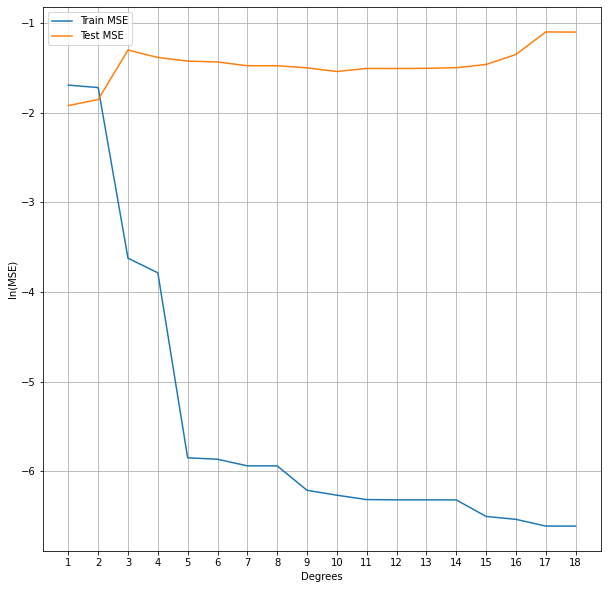

In [39]:
lin_reg_1 = LinearRegressionMSE()
lin_reg_1.fit(change_basis_vector_sine(x,1),y)
pred_1 = lin_reg_1.predict(change_basis_vector_sine(x,1))
mse_1 = lin_reg_1.mse(pred_1,y)

lin_reg_2 = LinearRegressionMSE()
lin_reg_2.fit(change_basis_vector_sine(x,2),y)
pred_2 = lin_reg_2.predict(change_basis_vector_sine(x,2))
mse_2 = lin_reg_2.mse(pred_2,y)

lin_reg_3 = LinearRegressionMSE()
lin_reg_3.fit(change_basis_vector_sine(x,3),y)
pred_3 = lin_reg_3.predict(change_basis_vector_sine(x,3))
mse_3 = lin_reg_3.mse(pred_3,y)

lin_reg_4 = LinearRegressionMSE()
lin_reg_4.fit(change_basis_vector_sine(x,4),y)
pred_4 = lin_reg_4.predict(change_basis_vector_sine(x,4))
mse_4 = lin_reg_4.mse(pred_4,y)

lin_reg_5 = LinearRegressionMSE()
lin_reg_5.fit(change_basis_vector_sine(x,5),y)
pred_5 = lin_reg_5.predict(change_basis_vector_sine(x,5))
mse_5 = lin_reg_5.mse(pred_5,y)

lin_reg_6 = LinearRegressionMSE()
lin_reg_6.fit(change_basis_vector_sine(x,6),y)
pred_6 = lin_reg_6.predict(change_basis_vector_sine(x,6))
mse_6 = lin_reg_6.mse(pred_6,y)

lin_reg_7 = LinearRegressionMSE()
lin_reg_7.fit(change_basis_vector_sine(x,7),y)
pred_7 = lin_reg_7.predict(change_basis_vector_sine(x,7))
mse_7 = lin_reg_7.mse(pred_7,y)

lin_reg_8 = LinearRegressionMSE()
lin_reg_8.fit(change_basis_vector_sine(x,8),y)
pred_8 = lin_reg_8.predict(change_basis_vector_sine(x,8))
mse_8 = lin_reg_8.mse(pred_8,y)

lin_reg_9 = LinearRegressionMSE()
lin_reg_9.fit(change_basis_vector_sine(x,9),y)
pred_9 = lin_reg_9.predict(change_basis_vector_sine(x,9))
mse_9 = lin_reg_9.mse(pred_9,y)

lin_reg_10 = LinearRegressionMSE()
lin_reg_10.fit(change_basis_vector_sine(x,10),y)
pred_10 = lin_reg_10.predict(change_basis_vector_sine(x,10))
mse_10 = lin_reg_10.mse(pred_10,y)

lin_reg_11 = LinearRegressionMSE()
lin_reg_11.fit(change_basis_vector_sine(x,11),y)
pred_11 = lin_reg_11.predict(change_basis_vector_sine(x,11))
mse_11 = lin_reg_11.mse(pred_11,y)

lin_reg_12 = LinearRegressionMSE()
lin_reg_12.fit(change_basis_vector_sine(x,12),y)
pred_12 = lin_reg_12.predict(change_basis_vector_sine(x,12))
mse_12 = lin_reg_12.mse(pred_12,y)

lin_reg_13 = LinearRegressionMSE()
lin_reg_13.fit(change_basis_vector_sine(x,13),y)
pred_13 = lin_reg_13.predict(change_basis_vector_sine(x,13))
mse_13 = lin_reg_13.mse(pred_13,y)

lin_reg_14 = LinearRegressionMSE()
lin_reg_14.fit(change_basis_vector_sine(x,14),y)
pred_14 = lin_reg_14.predict(change_basis_vector_sine(x,14))
mse_14 = lin_reg_14.mse(pred_14,y)

lin_reg_15 = LinearRegressionMSE()
lin_reg_15.fit(change_basis_vector_sine(x,15),y)
pred_15 = lin_reg_15.predict(change_basis_vector_sine(x,15))
mse_15 = lin_reg_15.mse(pred_15,y)

lin_reg_16 = LinearRegressionMSE()
lin_reg_16.fit(change_basis_vector_sine(x,16),y)
pred_16 = lin_reg_16.predict(change_basis_vector_sine(x,16))
mse_16 = lin_reg_16.mse(pred_16,y)

lin_reg_17 = LinearRegressionMSE()
lin_reg_17.fit(change_basis_vector_sine(x,17),y)
pred_17 = lin_reg_17.predict(change_basis_vector_sine(x,17))
mse_17 = lin_reg_17.mse(pred_17,y)

lin_reg_18 = LinearRegressionMSE()
lin_reg_18.fit(change_basis_vector_sine(x,18),y)
pred_18 = lin_reg_18.predict(change_basis_vector_sine(x,18))
mse_18 = lin_reg_18.mse(pred_18,y)

test_x = np.random.random(1000)
test_y = func_x_vectorised(test_x)+np.random.normal(0,0.07,1000)

test_x = test_x.reshape(-1,1)
test_y = test_y.reshape(-1,1)

test_mse_1 = lin_reg_1.mse(lin_reg_1.predict(change_basis_vector(test_x,1)),test_y)
test_mse_2 = lin_reg_2.mse(lin_reg_2.predict(change_basis_vector(test_x,2)),test_y)
test_mse_3 = lin_reg_3.mse(lin_reg_3.predict(change_basis_vector(test_x,3)),test_y)
test_mse_4 = lin_reg_4.mse(lin_reg_4.predict(change_basis_vector(test_x,4)),test_y)
test_mse_5 = lin_reg_5.mse(lin_reg_5.predict(change_basis_vector(test_x,5)),test_y)
test_mse_6 = lin_reg_6.mse(lin_reg_6.predict(change_basis_vector(test_x,6)),test_y)
test_mse_7 = lin_reg_7.mse(lin_reg_7.predict(change_basis_vector(test_x,7)),test_y)
test_mse_8 = lin_reg_8.mse(lin_reg_8.predict(change_basis_vector(test_x,8)),test_y)
test_mse_9 = lin_reg_9.mse(lin_reg_9.predict(change_basis_vector(test_x,9)),test_y)
test_mse_10 = lin_reg_10.mse(lin_reg_10.predict(change_basis_vector(test_x,10)),test_y)
test_mse_11 = lin_reg_11.mse(lin_reg_11.predict(change_basis_vector(test_x,11)),test_y)
test_mse_12 = lin_reg_12.mse(lin_reg_12.predict(change_basis_vector(test_x,12)),test_y)
test_mse_13 = lin_reg_13.mse(lin_reg_13.predict(change_basis_vector(test_x,13)),test_y)
test_mse_14 = lin_reg_14.mse(lin_reg_14.predict(change_basis_vector(test_x,14)),test_y)
test_mse_15 = lin_reg_15.mse(lin_reg_15.predict(change_basis_vector(test_x,15)),test_y)
test_mse_16 = lin_reg_16.mse(lin_reg_16.predict(change_basis_vector(test_x,16)),test_y)
test_mse_17 = lin_reg_17.mse(lin_reg_17.predict(change_basis_vector(test_x,17)),test_y)
test_mse_18 = lin_reg_18.mse(lin_reg_18.predict(change_basis_vector(test_x,18)),test_y)

train_mses = [mse_1,mse_2,mse_3,mse_4,mse_5,mse_6,mse_7,mse_8,mse_9,mse_10,mse_11,mse_12,mse_13,mse_14,mse_15,mse_16,mse_17,mse_18]
ln_mses =  np.asarray([np.log(mse) for mse in train_mses])
test_mses = [test_mse_1,test_mse_2,test_mse_3,test_mse_4,test_mse_5,test_mse_6,test_mse_7,test_mse_8,test_mse_9,test_mse_10,test_mse_11,test_mse_12,test_mse_13,test_mse_14,test_mse_15,test_mse_16,test_mse_17,test_mse_18]
ln_mses_test = [np.log(mse) for mse in test_mses]

degrees = np.arange(1,19,1)
plt.figure(figsize=[10,10])
plt.plot(degrees,ln_mses,label="Train MSE")
plt.plot(degrees,ln_mses_test,label="Test MSE")
plt.ylabel("ln(MSE)")
plt.xlabel("Degrees")
plt.xticks(np.arange(1,19,1))
plt.grid()
plt.legend()
plt.show()

In [40]:
def train_and_test_sine(iters):
    avgs_ln_train = np.zeros(18)
    avgs_ln_test = np.zeros(18)
    
    def change_basis_vector_sine(vector,degree):
        if degree == 1:
            return np.sin(np.pi*vector)
        output = np.sin(np.pi*vector)
        for i in range(2,degree+1):
            output = np.append(output,np.sin(i*np.pi*vector),axis=1)
        return output

    for iter in range(iters):

        sample_x = np.random.random(30)
        def func_x(x):
            return np.sin(2*np.pi*x)**2
        func_x_vectorised = np.vectorize(func_x)
        y = func_x_vectorised(sample_x)+np.random.normal(0,0.07,30)

        x = sample_x.reshape(-1,1)
        y = y.reshape(-1,1)

        lin_reg_1 = LinearRegressionMSE()
        lin_reg_1.fit(change_basis_vector_sine(x,1),y)
        pred_1 = lin_reg_1.predict(change_basis_vector_sine(x,1))
        mse_1 = lin_reg_1.mse(pred_1,y)

        lin_reg_2 = LinearRegressionMSE()
        lin_reg_2.fit(change_basis_vector_sine(x,2),y)
        pred_2 = lin_reg_2.predict(change_basis_vector_sine(x,2))
        mse_2 = lin_reg_2.mse(pred_2,y)

        lin_reg_3 = LinearRegressionMSE()
        lin_reg_3.fit(change_basis_vector_sine(x,3),y)
        pred_3 = lin_reg_3.predict(change_basis_vector_sine(x,3))
        mse_3 = lin_reg_3.mse(pred_3,y)

        lin_reg_4 = LinearRegressionMSE()
        lin_reg_4.fit(change_basis_vector_sine(x,4),y)
        pred_4 = lin_reg_4.predict(change_basis_vector_sine(x,4))
        mse_4 = lin_reg_4.mse(pred_4,y)

        lin_reg_5 = LinearRegressionMSE()
        lin_reg_5.fit(change_basis_vector_sine(x,5),y)
        pred_5 = lin_reg_5.predict(change_basis_vector_sine(x,5))
        mse_5 = lin_reg_5.mse(pred_5,y)

        lin_reg_6 = LinearRegressionMSE()
        lin_reg_6.fit(change_basis_vector_sine(x,6),y)
        pred_6 = lin_reg_6.predict(change_basis_vector_sine(x,6))
        mse_6 = lin_reg_6.mse(pred_6,y)

        lin_reg_7 = LinearRegressionMSE()
        lin_reg_7.fit(change_basis_vector_sine(x,7),y)
        pred_7 = lin_reg_7.predict(change_basis_vector_sine(x,7))
        mse_7 = lin_reg_7.mse(pred_7,y)

        lin_reg_8 = LinearRegressionMSE()
        lin_reg_8.fit(change_basis_vector_sine(x,8),y)
        pred_8 = lin_reg_8.predict(change_basis_vector_sine(x,8))
        mse_8 = lin_reg_8.mse(pred_8,y)

        lin_reg_9 = LinearRegressionMSE()
        lin_reg_9.fit(change_basis_vector_sine(x,9),y)
        pred_9 = lin_reg_9.predict(change_basis_vector_sine(x,9))
        mse_9 = lin_reg_9.mse(pred_9,y)

        lin_reg_10 = LinearRegressionMSE()
        lin_reg_10.fit(change_basis_vector_sine(x,10),y)
        pred_10 = lin_reg_10.predict(change_basis_vector_sine(x,10))
        mse_10 = lin_reg_10.mse(pred_10,y)

        lin_reg_11 = LinearRegressionMSE()
        lin_reg_11.fit(change_basis_vector_sine(x,11),y)
        pred_11 = lin_reg_11.predict(change_basis_vector_sine(x,11))
        mse_11 = lin_reg_11.mse(pred_11,y)

        lin_reg_12 = LinearRegressionMSE()
        lin_reg_12.fit(change_basis_vector_sine(x,12),y)
        pred_12 = lin_reg_12.predict(change_basis_vector_sine(x,12))
        mse_12 = lin_reg_12.mse(pred_12,y)

        lin_reg_13 = LinearRegressionMSE()
        lin_reg_13.fit(change_basis_vector_sine(x,13),y)
        pred_13 = lin_reg_13.predict(change_basis_vector_sine(x,13))
        mse_13 = lin_reg_13.mse(pred_13,y)

        lin_reg_14 = LinearRegressionMSE()
        lin_reg_14.fit(change_basis_vector_sine(x,14),y)
        pred_14 = lin_reg_14.predict(change_basis_vector_sine(x,14))
        mse_14 = lin_reg_14.mse(pred_14,y)

        lin_reg_15 = LinearRegressionMSE()
        lin_reg_15.fit(change_basis_vector_sine(x,15),y)
        pred_15 = lin_reg_15.predict(change_basis_vector_sine(x,15))
        mse_15 = lin_reg_15.mse(pred_15,y)

        lin_reg_16 = LinearRegressionMSE()
        lin_reg_16.fit(change_basis_vector_sine(x,16),y)
        pred_16 = lin_reg_16.predict(change_basis_vector_sine(x,16))
        mse_16 = lin_reg_16.mse(pred_16,y)

        lin_reg_17 = LinearRegressionMSE()
        lin_reg_17.fit(change_basis_vector_sine(x,17),y)
        pred_17 = lin_reg_17.predict(change_basis_vector_sine(x,17))
        mse_17 = lin_reg_17.mse(pred_17,y)

        lin_reg_18 = LinearRegressionMSE()
        lin_reg_18.fit(change_basis_vector_sine(x,18),y)
        pred_18 = lin_reg_18.predict(change_basis_vector_sine(x,18))
        mse_18 = lin_reg_18.mse(pred_18,y)

        test_x = np.random.random(1000)
        test_y = func_x_vectorised(test_x)+np.random.normal(0,0.07,1000)

        test_x = test_x.reshape(-1,1)
        test_y = test_y.reshape(-1,1)

        test_mse_1 = lin_reg_1.mse(lin_reg_1.predict(change_basis_vector(test_x,1)),test_y)
        test_mse_2 = lin_reg_2.mse(lin_reg_2.predict(change_basis_vector(test_x,2)),test_y)
        test_mse_3 = lin_reg_3.mse(lin_reg_3.predict(change_basis_vector(test_x,3)),test_y)
        test_mse_4 = lin_reg_4.mse(lin_reg_4.predict(change_basis_vector(test_x,4)),test_y)
        test_mse_5 = lin_reg_5.mse(lin_reg_5.predict(change_basis_vector(test_x,5)),test_y)
        test_mse_6 = lin_reg_6.mse(lin_reg_6.predict(change_basis_vector(test_x,6)),test_y)
        test_mse_7 = lin_reg_7.mse(lin_reg_7.predict(change_basis_vector(test_x,7)),test_y)
        test_mse_8 = lin_reg_8.mse(lin_reg_8.predict(change_basis_vector(test_x,8)),test_y)
        test_mse_9 = lin_reg_9.mse(lin_reg_9.predict(change_basis_vector(test_x,9)),test_y)
        test_mse_10 = lin_reg_10.mse(lin_reg_10.predict(change_basis_vector(test_x,10)),test_y)
        test_mse_11 = lin_reg_11.mse(lin_reg_11.predict(change_basis_vector(test_x,11)),test_y)
        test_mse_12 = lin_reg_12.mse(lin_reg_12.predict(change_basis_vector(test_x,12)),test_y)
        test_mse_13 = lin_reg_13.mse(lin_reg_13.predict(change_basis_vector(test_x,13)),test_y)
        test_mse_14 = lin_reg_14.mse(lin_reg_14.predict(change_basis_vector(test_x,14)),test_y)
        test_mse_15 = lin_reg_15.mse(lin_reg_15.predict(change_basis_vector(test_x,15)),test_y)
        test_mse_16 = lin_reg_16.mse(lin_reg_16.predict(change_basis_vector(test_x,16)),test_y)
        test_mse_17 = lin_reg_17.mse(lin_reg_17.predict(change_basis_vector(test_x,17)),test_y)
        test_mse_18 = lin_reg_18.mse(lin_reg_18.predict(change_basis_vector(test_x,18)),test_y)

        train_mses = [mse_1,mse_2,mse_3,mse_4,mse_5,mse_6,mse_7,mse_8,mse_9,mse_10,mse_11,mse_12,mse_13,mse_14,mse_15,mse_16,mse_17,mse_18]
        ln_mses =  np.asarray([np.log(mse) for mse in train_mses])
        test_mses = [test_mse_1,test_mse_2,test_mse_3,test_mse_4,test_mse_5,test_mse_6,test_mse_7,test_mse_8,test_mse_9,test_mse_10,test_mse_11,test_mse_12,test_mse_13,test_mse_14,test_mse_15,test_mse_16,test_mse_17,test_mse_18]
        ln_mses_test = [np.log(mse) for mse in test_mses]

        avgs_ln_train += ln_mses 
        avgs_ln_test += ln_mses_test

    return avgs_ln_train/iter,avgs_ln_test/iter

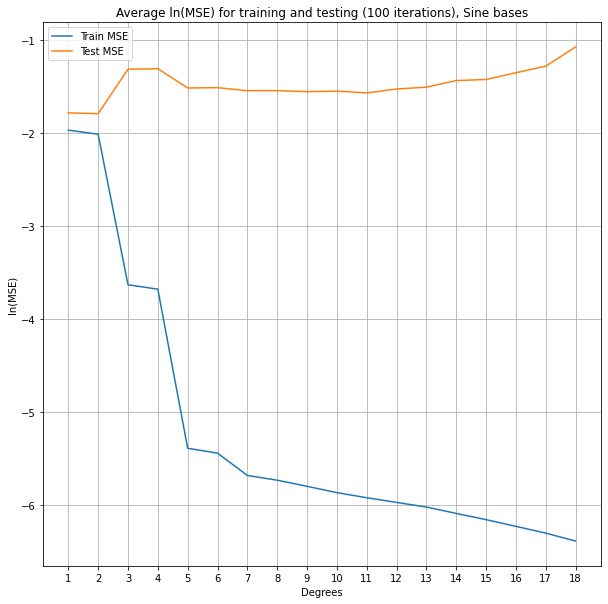

In [41]:
avgs_ln_train, avgs_ln_test = train_and_test_sine(100)
degrees = np.arange(1,19,1)
plt.figure(figsize=[10,10])
plt.plot(degrees,avgs_ln_train,label="Train MSE")
plt.plot(degrees,avgs_ln_test,label="Test MSE")
plt.ylabel("ln(MSE)")
plt.xlabel("Degrees")
plt.xticks(np.arange(1,19,1))
plt.title("Average ln(MSE) for training and testing (100 iterations), Sine bases")
plt.grid()
plt.legend()
plt.show()

## 1.2. Filtered Boston Housing and Kernels (10 marks)

In [42]:
url = "http://www0.cs.ucl.ac.uk/staff/M.Herbster/boston-filter/Boston-filtered.csv"
dataset = pd.read_csv(url)

In [55]:
def train_test_split(dataset):
    train_ind = np.random.choice(range(len(dataset)),337,replace=False)
    test_ind = np.asarray(list(set(range(len(dataset)))-set(train_ind)))
    train = dataset.loc[train_ind]
    train_x = train.loc[:,dataset.columns!="MEDV"]
    train_y = train[["MEDV"]]
    test = dataset.loc[test_ind]
    test_x = test.loc[:,dataset.columns!="MEDV"]
    test_y = test[["MEDV"]]   
    return train_x,train_y,test_x,test_y

### 1.2. a) Naive Regression

In [286]:
def run_training_and_testing_part_a(dataset,iters):
    train_mses = []
    test_mses = []
    for iter in range(iters):
        train_x,train_y,test_x,test_y = train_test_split(dataset)
        train_x = np.asarray(train_x)
        train_y = np.asarray(train_y)

        test_x = np.asarray(test_x)
        test_y = np.asarray(test_y)
        train_vec = np.ones(train_x.shape[0]).reshape(-1,1)
        test_vec = np.ones(test_x.shape[0]).reshape(-1,1)

        naive_reg = LinearRegressionMSE()
        naive_reg.fit(train_vec,train_y)
        train_mses.append(naive_reg.mse(naive_reg.predict(train_vec),train_y))
        test_mses.append(naive_reg.mse(naive_reg.predict(test_vec),test_y))

        coef = naive_reg.coef_[0]
        train_mean = train_y.mean()
        test_mean = test_y.mean()

    print(f"Naive regression predicts the mean of the median value of the owner-occupied homes training dataset: regression coefficient - {coef}, training mean median value - {train_mean}, testing mean median value - {test_mean} for the last iteration \n")
    train_mses = np.asarray(train_mses)
    test_mses = np.asarray(test_mses)
    return train_mses.mean(),test_mses.mean(),train_mses.std(),test_mses.std()

In [288]:
train_mse,test_mse,train_std,test_std = run_training_and_testing_part_a(dataset,20)
print(f"Average MSE for 20 iterations: training - {train_mse}, testing - {test_mse}")

Naive regression predicts the mean of the median value of the owner-occupied homes training dataset: regression coefficient - [22.47418398], training mean median value - 22.474183976261127, testing mean median value - 22.649704142011835 for the last iteration 

Average MSE for 20 iterations: training - 84.91510676328927, testing - 83.84328548997219


### c) Single attributes

In [309]:
def run_training_and_testing_part_c(dataset,iters):
    attribute_train_mse = {}
    attribute_test_mse = {}
    for iter in range(iters):
        train_x,train_y,test_x,test_y = train_test_split(dataset)
        train_x = np.asarray(train_x)
        train_y = np.asarray(train_y)
        test_x = np.asarray(test_x)
        test_y = np.asarray(test_y)

        for attr in range(train_x.shape[1]):
            lin_reg = LinearRegressionMSE()
            attr_vector = train_x[:,attr].reshape(-1,1)
            attr_vector_test = test_x[:,attr].reshape(-1,1)
            lin_reg.fit(change_basis_vector(attr_vector,2),train_y)

            if dataset.columns[attr] not in attribute_train_mse:
                attribute_train_mse[dataset.columns[attr]] = lin_reg.mse(lin_reg.predict(change_basis_vector(attr_vector,2)),train_y)
            else:
                attribute_train_mse[dataset.columns[attr]] += lin_reg.mse(lin_reg.predict(change_basis_vector(attr_vector,2)),train_y)

            if dataset.columns[attr] not in attribute_test_mse:
                attribute_test_mse[dataset.columns[attr]] = lin_reg.mse(lin_reg.predict(change_basis_vector(attr_vector_test,2)),test_y)
            else:
                attribute_test_mse[dataset.columns[attr]] += lin_reg.mse(lin_reg.predict(change_basis_vector(attr_vector_test,2)),test_y)
              
    for attr in attribute_train_mse:
        attribute_train_mse[attr] /= iters
        attribute_test_mse[attr] /= iters

    return attribute_train_mse,attribute_test_mse

In [310]:
attribute_train_mse,attribute_test_mse, = run_training_and_testing_part_c(dataset,20)
attribute_train_mse,attribute_test_mse

({'CRIM': 71.31226984007397,
  ' ZN ': 72.78680111845279,
  'INDUS ': 63.51442466515603,
  'CHAS': 81.34892456170189,
  'NOX': 68.69915369320262,
  'RM': 42.401881745451725,
  'AGE': 72.19146442494868,
  'DIS': 78.5376832325313,
  'RAD': 71.91376279476954,
  'TAX': 65.1781746938755,
  'PTRATIO': 62.11575870434366,
  'LSTAT': 38.54939584519075},
 {'CRIM': 73.34496421107607,
  ' ZN ': 75.08330220279231,
  'INDUS ': 67.27396772448478,
  'CHAS': 83.41056067402725,
  'NOX': 69.87349781918812,
  'RM': 46.40773934541103,
  'AGE': 73.23238693434351,
  'DIS': 80.67927271224136,
  'RAD': 72.95770392411782,
  'TAX': 67.63519251078608,
  'PTRATIO': 64.15292970855828,
  'LSTAT': 38.745567130957426})

### d) All attributes

In [311]:
def run_training_and_testing_part_d(dataset,iters):
    train_mse = []
    test_mse = []
    for iter in range(iters):
        train_x,train_y,test_x,test_y = train_test_split(dataset)
        train_x = np.asarray(train_x)
        train_y = np.asarray(train_y)
        test_x = np.asarray(test_x)
        test_y = np.asarray(test_y)

        train_x = np.append(train_x,np.ones(train_x.shape[0]).reshape(-1,1),axis=1)
        test_x = np.append(test_x,np.ones(test_x.shape[0]).reshape(-1,1),axis=1)
        lin_reg = LinearRegressionMSE()
        lin_reg.fit(train_x,train_y)
        train_mse.append(lin_reg.mse(lin_reg.predict(train_x),train_y))
        test_mse.append(lin_reg.mse(lin_reg.predict(test_x),test_y))

    train_mse = np.asarray(train_mse)
    test_mse = np.asarray(test_mse)
    return train_mse.mean(),test_mse.mean(),train_mse.std(),test_mse.std()

In [312]:
train_mse,test_mse,train_std,test_std = run_training_and_testing_part_d(dataset,20)
print(f"Training and testing MSEs for all attributes (after 20 iterations): training - {train_mse}, testing - {test_mse}")

Training and testing MSEs for all attributes (after 20 iterations): training - 21.74097672319946, testing - 24.98949415978243


## 1.3. Kernelised Ridge Regression

### 1.3. a) Five-fold cross-validation

In [72]:
def radial_gaussian_kernel(sigma,x1,x2):
    return np.exp(-(np.linalg.norm(x1-x2)**2)/(2*sigma**2))

In [73]:
class KernelisedRidgeRegression:
    def __init__(self):
        self.alpha_ = []
    def fit(self,kernel,reg_param,y):
        self.alpha_ = np.linalg.inv(kernel+reg_param*kernel.shape[0]*np.identity(kernel.shape[0]))@y
    def predict(self,kernel):
        return self.alpha_.T @ kernel.T
    def mse(self,pred,y):
        return np.sum((abs(pred-y)**2))/pred.shape[0]

In [231]:
def five_fold_cv(dataset):
    train_ind = np.random.choice(range(len(dataset)),340,replace=False) #previously used 337, which is the approximation for 2/3 of the dataset, and at this point used 340 to split the training data into 5 equal parts.
    test_ind = np.asarray(list(set(range(len(dataset)))-set(train_ind)))
    train = dataset.loc[train_ind]
    train_x = train.loc[:,dataset.columns!="MEDV"]
    train_y = train[["MEDV"]]
    test = dataset.loc[test_ind]
    test_x = test.loc[:,dataset.columns!="MEDV"]
    test_y = test[["MEDV"]]   
    train_x = np.asarray(train_x)
    train_y = np.asarray(train_y)
    test_x = np.asarray(test_x)
    test_y = np.asarray(test_y)

    lambda_indexes = np.arange(-40,-25,1)
    gamma_indexes = np.arange(7,13.5,0.5)
    
    grid = np.asarray([[0.0]*gamma_indexes.shape[0] for x in range(lambda_indexes.shape[0])])

    for lambd in range(lambda_indexes.shape[0]): #15
        for gamma in range(gamma_indexes.shape[0]): #13
            cv_mses = []
            for fold in range(5):
                test_fold_x = train_x[fold*68:fold*68+68]
                test_fold_y = train_y[fold*68:fold*68+68]
                train_fold_x = np.append(train_x[:fold*68],train_x[fold*68+68:],axis=0)
                train_fold_y = np.append(train_y[:fold*68],train_y[fold*68+68:],axis=0)

                kernel_matrix = np.asarray([[0.0]*train_fold_x.shape[0] for x in range(train_fold_x.shape[0])])

                for i in range(train_fold_x.shape[0]):
                    for j in range(train_fold_x.shape[0]):
                        kernel_matrix[i,j] = radial_gaussian_kernel(2**gamma_indexes[gamma],train_fold_x[i,:],train_fold_x[j,:])

                ker_rid_reg = KernelisedRidgeRegression()
                ker_rid_reg.fit(kernel_matrix,2**int(lambda_indexes[lambd]),train_fold_y)

                kernel_test = np.asarray([[0.0]*train_fold_x.shape[0] for x in range(test_fold_x.shape[0])])
                for i in range(train_fold_x.shape[0]):
                    for j in range(test_fold_x.shape[0]):
                        kernel_test[j,i] = radial_gaussian_kernel(2**gamma_indexes[gamma],train_fold_x[i,:],test_fold_x[j,:])

                cv_mses.append(ker_rid_reg.mse(ker_rid_reg.predict(kernel_test).reshape(-1,1),test_fold_y))
            
            grid[lambd][gamma] = np.asarray(cv_mses).mean()
            print(f" Regularisation parameter - 2^{lambda_indexes[lambd]}, Standard deviation - 2^{gamma_indexes[gamma]}, Cross-validation MSE - {np.asarray(cv_mses).mean()}")

    return grid

In [232]:
grid = five_fold_cv(dataset)

665906110429
 Regularisation parameter - 2^-40, Standard deviation - 2^9.5, Cross-validation MSE - 17.40868052544456
 Regularisation parameter - 2^-40, Standard deviation - 2^10.0, Cross-validation MSE - 13.231432095139695
 Regularisation parameter - 2^-40, Standard deviation - 2^10.5, Cross-validation MSE - 11.897921349486293
 Regularisation parameter - 2^-40, Standard deviation - 2^11.0, Cross-validation MSE - 11.67641226627442
 Regularisation parameter - 2^-40, Standard deviation - 2^11.5, Cross-validation MSE - 11.853406732766675
 Regularisation parameter - 2^-40, Standard deviation - 2^12.0, Cross-validation MSE - 11.795989777422314
 Regularisation parameter - 2^-40, Standard deviation - 2^12.5, Cross-validation MSE - 12.190786111004282
 Regularisation parameter - 2^-40, Standard deviation - 2^13.0, Cross-validation MSE - 14.175427430380108
 Regularisation parameter - 2^-39, Standard deviation - 2^7.0, Cross-validation MSE - 1172.6796810559679
 Regularisation parameter - 2^-39, St

### 1.3. b) Cross-validation MSE as a function of standard deviation and regularisation parameter 

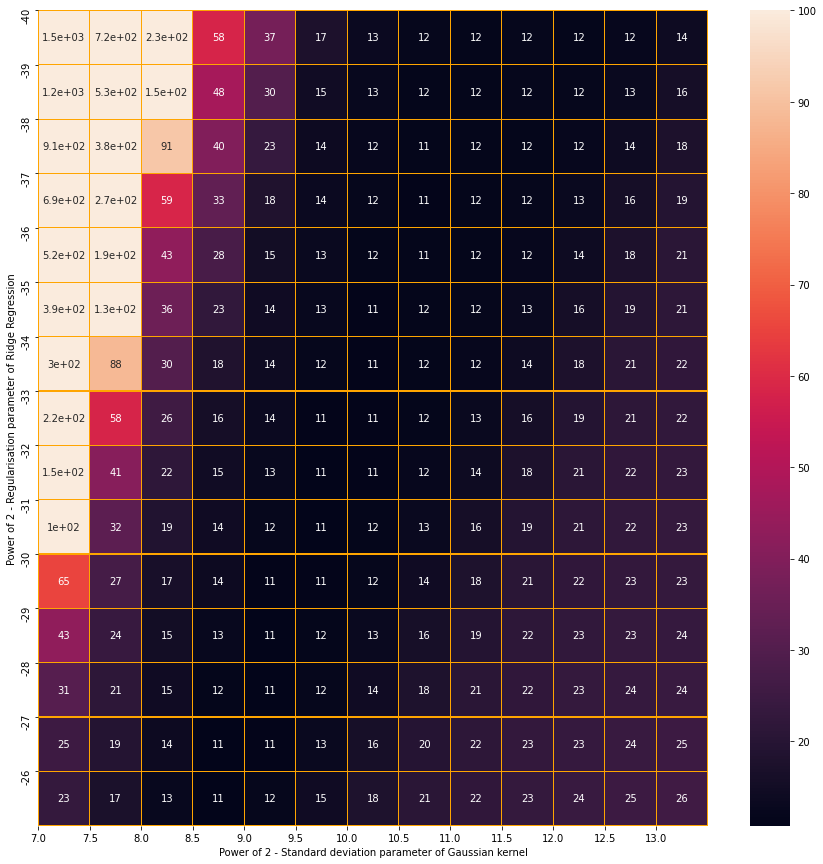

In [266]:
plt.figure(figsize=[15,15])
sbn.heatmap(grid,vmax=100,annot=True,linewidth=0.2,linecolor="orange")
plt.xlabel("Power of 2 - Standard deviation parameter of Gaussian kernel")
plt.ylabel("Power of 2 - Regularisation parameter of Ridge Regression")
plt.xticks(np.arange(0,13,1),np.arange(7,13.5,0.5))
plt.yticks(np.arange(0,15,1),np.arange(-40,-25,1))
plt.show()

### 1.3. c) Training and testing MSEs for the best combination of the standard deviation and regularisation parameter

In [282]:
lambda_indexes = np.arange(-40,-25,1)
gamma_indexes = np.arange(7,13.5,0.5)

print(f"The minimum cross-validation MSE was - {np.asarray(grid).min()}, which was achieved with the 2^{gamma_indexes[np.where(grid == np.asarray(grid).min())[1][0]]} standard deviation and the 2^{lambda_indexes[np.where(grid == np.asarray(grid).min())[0][0]]} regularisation parameter")

The minimum cross-validation MSE was - 10.765110061005043, which was achieved with the 2^8.5 standard deviation and the 2^-26 regularisation parameter


In [283]:
def train_and_test_ridge_regression(dataset,iters):
    train_mses = []
    test_mses = []
    for iter in range(iters):

        train_x,train_y,test_x,test_y = train_test_split(dataset)
        train_x = np.asarray(train_x)
        train_y = np.asarray(train_y)
        test_x = np.asarray(test_x)
        test_y = np.asarray(test_y)

        kernel_matrix = np.asarray([[0.0]*train_x.shape[0] for x in range(train_x.shape[0])])
        for i in range(train_x.shape[0]):
            for j in range(train_x.shape[0]):
                kernel_matrix[i,j] = radial_gaussian_kernel(2**8.5,train_x[i,:],train_x[j,:])
        ker_rid_reg = KernelisedRidgeRegression()
        ker_rid_reg.fit(kernel_matrix,2**(-26),train_y)
        kernel_test = np.asarray([[0.0]*train_x.shape[0] for x in range(test_x.shape[0])])
        for i in range(train_x.shape[0]):
            for j in range(test_x.shape[0]):
                kernel_test[j,i] = radial_gaussian_kernel(2**8.5,train_x[i,:],test_x[j,:])

        train_mses.append(ker_rid_reg.mse(ker_rid_reg.predict(kernel_matrix).reshape(-1,1),train_y))
        test_mses.append(ker_rid_reg.mse(ker_rid_reg.predict(kernel_test).reshape(-1,1),test_y))
    
    return np.asarray(train_mses).mean(),np.asarray(test_mses).mean()

In [284]:
train_mse,test_mse = train_and_test_ridge_regression(dataset,1)
print(f"Training and testing MSEs for kernelised ridge regression: training - {train_mse}, testing - {test_mse}")

Training and testing MSEs for kernelised ridge regression: training - 8.471355588717483, testing - 10.900885680912296


### 1.3. d) Final results table

#### Naive regression

In [293]:
naive_train_mean,naive_test_mean,naive_train_std,naive_test_std = run_training_and_testing_part_a(dataset,20)
naive_train_mean,naive_test_mean,naive_train_std,naive_test_std

Naive regression predicts the mean of the median value of the owner-occupied homes training dataset: regression coefficient - [22.21364985], training mean median value - 22.21364985163205, testing mean median value - 23.16923076923077 for the last iteration 



(83.69655333761855, 86.26898598427847, 5.250626252453363, 10.874787403078448)

#### Single attributes

#### All attributes

In [294]:
all_train_mean,all_test_mean,all_train_std,all_test_std = run_training_and_testing_part_d(dataset,20)
all_train_mean,all_test_mean,all_train_std,all_test_std

(22.072236716060825, 24.6567880219152, 1.7346019952973262, 3.71907467743782)